# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# pip install citipy before running this code if you haven't already

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# set up lists to hold reponse info
temp = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cityies = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        wind_speed.append(response['wind']['speed'])
        cityies.append(city)
        print(f"we have found {city}")
    except:
        print("Oopsie")

we have found bluff
we have found rikitea
we have found bondo
Oopsie
we have found hobart
we have found sanming
we have found vaini
we have found port lincoln
we have found fairbanks
we have found port alfred
we have found ushuaia
we have found loubomo
we have found castro
we have found kapaa
we have found adrar
we have found barrow
we have found cidreira
we have found skovorodino
we have found puerto ayora
Oopsie
Oopsie
we have found airai
we have found pacific grove
we have found port blair
we have found east london
we have found avarua
Oopsie
we have found cabo san lucas
we have found san quintin
we have found araouane
we have found batouri
we have found jamestown
we have found shelburne
Oopsie
we have found waipawa
we have found brae
we have found atuona
we have found pisco
we have found hobe sound
we have found lasa
we have found haines junction
we have found butaritari
we have found hermanus
we have found busselton
we have found morehead
we have found padang
we have found ribeira

we have found tiznit
Oopsie
we have found coruripe
we have found ashland
we have found marshall
we have found frankfort
we have found newport
we have found laguna
we have found banjar
we have found chernyshevsk
we have found ust-nera
we have found asyut
we have found peniche
we have found leningradskiy
Oopsie
we have found vaitape
we have found lucapa
Oopsie
we have found ostersund
we have found bilibino
Oopsie
we have found ashford
we have found te anau
we have found pekan
we have found paracatu
we have found clyde river
we have found khartoum
we have found yangambi
we have found ahuimanu
we have found kyren
we have found provideniya
we have found vilyuysk
we have found santa cruz cabralia
we have found talnakh
we have found vao
we have found channel-port aux basques
we have found havoysund
we have found biak
we have found yerofey pavlovich
we have found palmas
we have found alta floresta
we have found natal
we have found jalu
we have found vardo
we have found tuatapere
we have found 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({"City":cityies, "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Humidity":humidity,
                          "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Country":country, "Date":date})
weather_df.to_csv('Weather.csv')
weather_df.head()
#len(weather_df)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.60,168.33,9.86,94,100,5.20,NZ,1593313097
1,rikitea,-23.12,-134.97,21.17,72,9,8.92,PF,1593313097
2,bondo,3.81,23.69,19.03,97,92,0.61,CD,1593313097
3,hobart,-42.88,147.33,10.00,66,0,2.60,AU,1593312828
4,sanming,26.25,117.62,34.23,49,100,2.85,CN,1593313098


In [5]:
weather_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_df.drop(weather_df.loc[weather_df['Humidity']>100].index, inplace=False)
weather_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.60,168.33,9.86,94,100,5.20,NZ,1593313097
1,rikitea,-23.12,-134.97,21.17,72,9,8.92,PF,1593313097
2,bondo,3.81,23.69,19.03,97,92,0.61,CD,1593313097
3,hobart,-42.88,147.33,10.00,66,0,2.60,AU,1593312828
4,sanming,26.25,117.62,34.23,49,100,2.85,CN,1593313098
5,vaini,-21.20,-175.20,26.00,83,75,3.60,TO,1593313098
6,port lincoln,-34.73,135.87,15.51,46,0,5.16,AU,1593313098
7,fairbanks,64.84,-147.72,21.11,37,1,1.12,US,1593312932
8,port alfred,-33.59,26.89,16.56,50,85,15.48,ZA,1593312844
9,ushuaia,-54.80,-68.30,2.00,59,20,7.70,AR,1593313098


In [7]:
#  Get the indices of cities that have humidity over 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

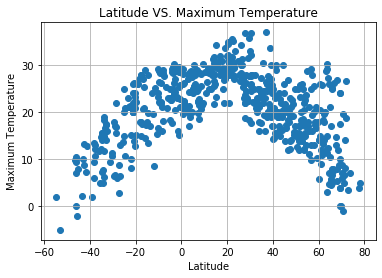

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude VS. Maximum Temperature")
plt.grid(True)

#saving the figure
plt.savefig("../output_data/Coudiness_vs_Latitude.png")

#Show plot
plt.show()

## Latitude vs. Humidity Plot

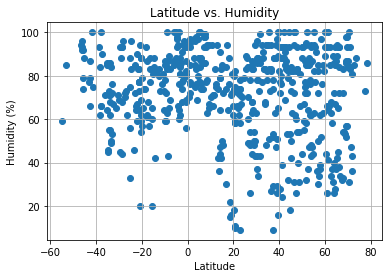

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.grid(True)

#saving the figure
plt.savefig("../output_data/latitude_vs_humidity.png")

#Show plot
plt.show()

## Latitude vs. Cloudiness Plot

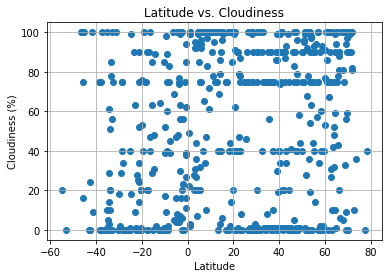

In [15]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.grid(True)

#saving the figure
plt.savefig("../output_data/latitude_vs_coudiness.png")

#Show plot
plt.show()

## Latitude vs. Wind Speed Plot

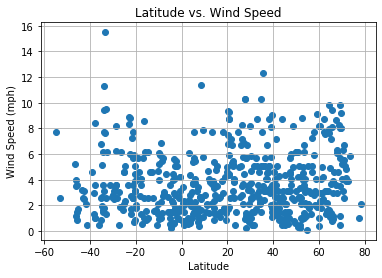

In [16]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed")
plt.grid(True)

#saving the figure
plt.savefig("../output_data/latitude_vs_wind_speed.png")

#Show plot
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

In [13]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


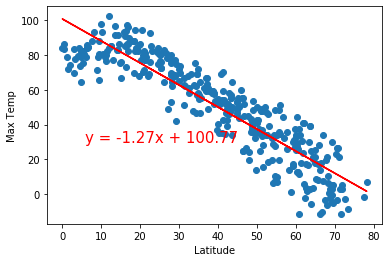

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


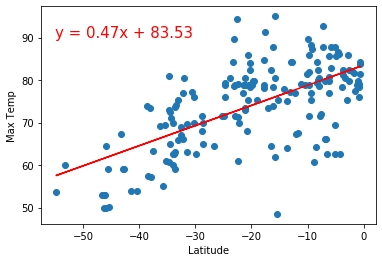

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


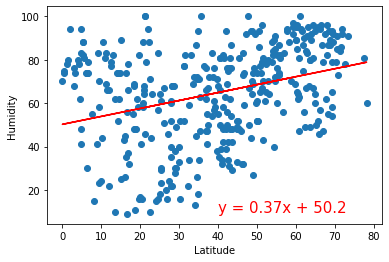

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


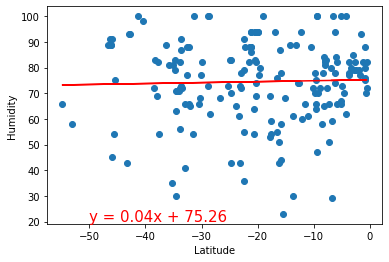

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


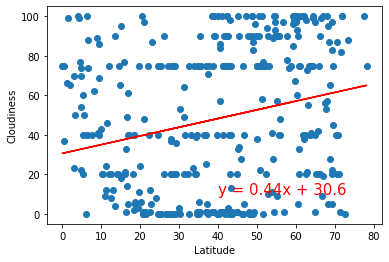

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


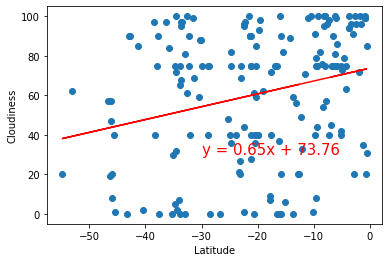

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


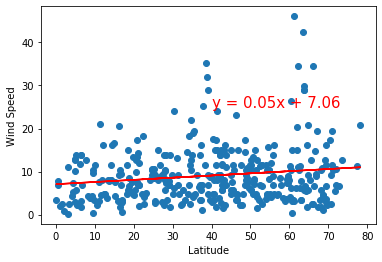

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


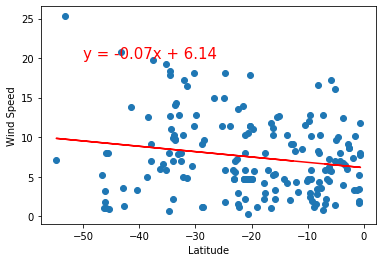